In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV

# Question 1, 2 et 3

In [2]:
def simu(n, alpha, beta):
    """Simule et affiche un echantillon de taille n.
    Renvoie les jeux d'entrainement/test avec les étiquettes dissociées.
    """
    if (alpha>1) | (alpha<0) | (beta>1) | (beta<0):
        raise ValueError('Les paramètres alpha et beta doivent être compris entre 0 et 1.')
        ## Utiliser sns.relplot pour la partie graphique
    
   

Exercice : programmer "à la main" la fonction train_test_split

In [3]:
def traintestsplitalamain(X,Y,trainsize):
    ## prend en entrée une matrice X de taille n x p
    ## et un vecteur Y de taille n
    ## trainsize désigne la proportion de données attribuées à l'entraînement
    ## renvoie Xtrain, Xtest, Ytrain, Ytest
    
    

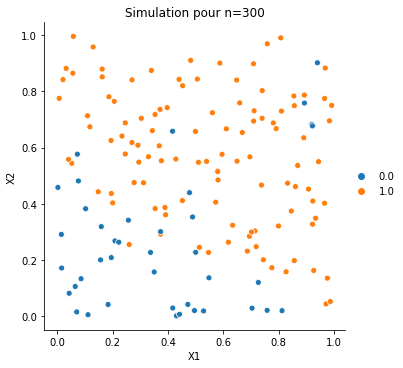

In [4]:
X_train, X_test, y_train, y_test = simu(300, .1, .9, display=True)

# Question 4

Consulter la classe KNeighborsClassifier de sklearn

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)


y_pred = [1. 1.]


# Question 5, 6, 7 et 8

In [6]:
def evaluate(clf, X_train, X_test, y_train, y_test, display=False):
    # Ecrire une fonction qui permet de :
    # Pour un prédicteur clf fait :
    # "Fitter les données d'entraînement avec clf.fit"
    # "Prédire l'échantillon test avec clf.predict"
    # "Calculer le score avec la fonction accuracy_score"
    # "Tracer un graphe avec les bien classés 0 ou 1 et les mal classés, on pourra utiliser sns.scatterplot"
    # afficher la matrice de confusion
    
        
    return score

Name model: KNeighborsClassifier(n_neighbors=1) , Accuracy: 0.8333333333333334


0.8333333333333334

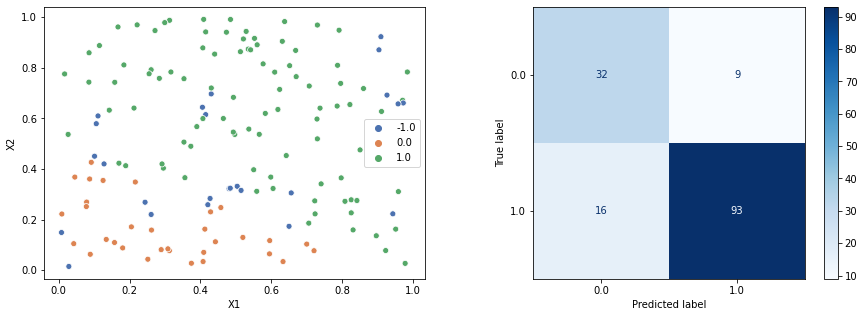

In [7]:
knn1 = KNeighborsClassifier(n_neighbors=1)
evaluate(knn1, X_train, X_test, y_train, y_test, display=True)

Name model: KNeighborsClassifier(n_neighbors=20) , Accuracy: 0.9266666666666666


0.9266666666666666

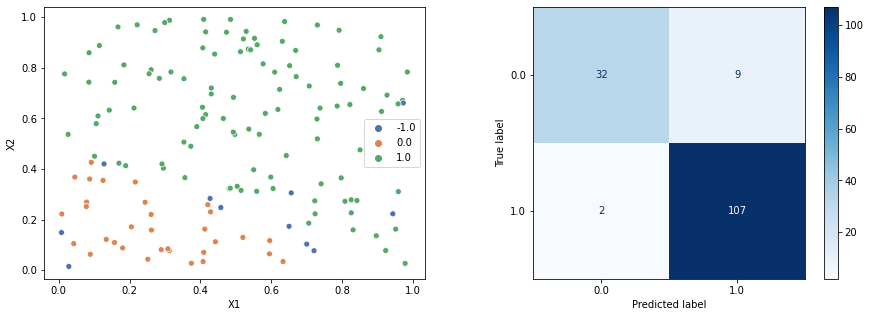

In [8]:
knn20 = KNeighborsClassifier(n_neighbors=20)
evaluate(knn20, X_train, X_test, y_train, y_test, display=True)

# Question 9

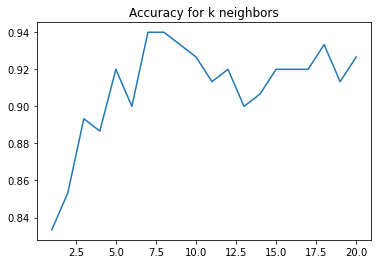

In [9]:
n = range(1, 21)
clfs = [KNeighborsClassifier(n_neighbors=k) for k in n]
## Afficher le graphe de l'évolution de l'accuracy


{1: 0.8333333333333334,
 2: 0.8533333333333334,
 3: 0.8933333333333333,
 4: 0.8866666666666667,
 5: 0.92,
 6: 0.9,
 7: 0.94,
 8: 0.94,
 9: 0.9333333333333333,
 10: 0.9266666666666666,
 11: 0.9133333333333333,
 12: 0.92,
 13: 0.9,
 14: 0.9066666666666666,
 15: 0.92,
 16: 0.92,
 17: 0.92,
 18: 0.9333333333333333,
 19: 0.9133333333333333,
 20: 0.9266666666666666}

In [11]:
print("Best estimator:", KNeighborsClassifier(n_neighbors=max(res, key=res.get)))

Best estimator: KNeighborsClassifier(n_neighbors=7)


# Question 11

### LOO

In [13]:
print("Mean score:", np.mean(scores))

Mean score: 0.86


### 5-fold

In [16]:
##Utiliser GridSearchcv

print(f"Best parameters: {clf.best_params_} with mean score of {round(clf.best_score_,3)}")

Best parameters: {'n_neighbors': 5} with mean score of 0.887


Exercice : tester avec d'autres métriques, voir https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

# Question 12

In [17]:
final_clf = clf.best_estimator_
final_clf.fit(X_test, y_test)
y_pred = final_clf.predict(X_test)
print("Final accuracy score:", accuracy_score(y_test, y_pred))

Final accuracy score: 0.8733333333333333


In [18]:
clf.cv_results_

{'mean_fit_time': array([0.00113626, 0.00068822, 0.00050836, 0.00052657, 0.00055394,
        0.00050726, 0.00049672, 0.00050254, 0.00050192, 0.00060587,
        0.000529  , 0.00049996, 0.00054398, 0.00049748, 0.00049434,
        0.00055122, 0.00051112, 0.00060539, 0.00049767, 0.00049706]),
 'std_fit_time': array([3.88860086e-04, 1.09347983e-04, 1.24393280e-05, 5.58073881e-05,
        8.48251088e-05, 3.12295941e-05, 1.58383169e-05, 1.45988507e-05,
        9.93310287e-06, 6.86594842e-05, 2.94619772e-05, 1.55882727e-05,
        9.95775511e-05, 1.43119478e-05, 8.58386354e-06, 1.21453429e-04,
        7.27766611e-06, 1.64070818e-04, 1.07384744e-05, 9.78085887e-06]),
 'mean_score_time': array([0.00402746, 0.00220418, 0.00215979, 0.00203142, 0.00197797,
        0.00199752, 0.00195336, 0.00206089, 0.00199471, 0.00223994,
        0.00214543, 0.00204873, 0.00197515, 0.00200329, 0.00197659,
        0.00199256, 0.00210161, 0.00215197, 0.00205622, 0.00203795]),
 'std_score_time': array([8.89796556e-

> Le score final est logiquement proche du score moyen de validation car les échantillon d'entrainement et de test ont été généré avec les mêmes lois.